<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">The Spectral Element Method</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Interpolation with Lagrange Polynomials</div>
        </div>
    </div>
</div>

This notebook covers the following aspects:
* Define Lagrange polynomials 
* Define a function to initialize and calculate  Lagrange polynomial for order N
* Interpolation of a function using GLL collocation points

#### Basics

We can approximate an arbitrary function $f(x)$ using the interpolation with Lagrange polynomials $l_i$ at given collacation points $x_i$, i.e.

\begin{eqnarray*}
f(x) = \sum f(x_i) \cdot l_i(x).
\end{eqnarray*}

The Lagrange polynomials at $x$ are defined as follows:

$$ \ell_i^{(N)} (x) \ := \ \prod_{k = 1, \ k \neq i}^{N+1} \frac{x - x_k}{x_i-x_k}, \qquad   i = 1, 2, \dotsc , N + 1  $$


They are implemented in Python with the following code:

In [1]:
# Setup
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from gll import gll

# Prettier plots.
plt.style.use('ggplot')

In [2]:
def lagrange(N, i, x, xi):
    """
    Function to calculate  Lagrange polynomial for order N
    and polynomial i [0, N] at location x at given collocation points xi
    (not necessarily the GLL-points)
    """
    fac = 1
    for j in range(-1, N):
        if j != i:
            fac = fac * ((x - xi[j + 1]) / (xi[i + 1] - xi[j + 1]))
    return fac

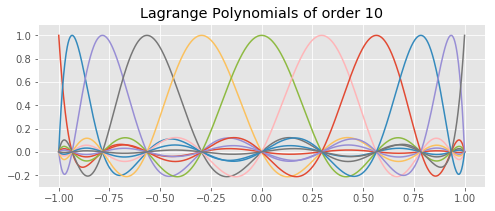

In [3]:
N = 10   # N_max = 12
x = np.linspace(-1, 1, 1000)
xi, _ = gll(N)

# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# -------------------------------
plt.figure(figsize=(8, 3))
for _i in range(-1,N):
    plt.plot(x, lagrange(N, _i, x, xi))
plt.ylim(-0.3, 1.1)
plt.title("Lagrange Polynomials of order %i" % N)
plt.show()

###  Lagrange Interpolation

* Use the `gll()` routine to determine the collocation points for a given order $N$ in the interval $[-1,1]$.
* Define an arbitrary function $f(x)$ and use the function `lagrange(N,i,x,x_i)` to get the $i$-th Lagrange polynomials of order N at the point x.
* Calculate the interpolating function to $f(x)$.
* Show that the interpolation is exact at the collocation points.
* Compare the original function $f(x)$ and the interpolating function on a finely spaced grid. Vary the order of the interpolating polynomials and calculate the error as a function of order.

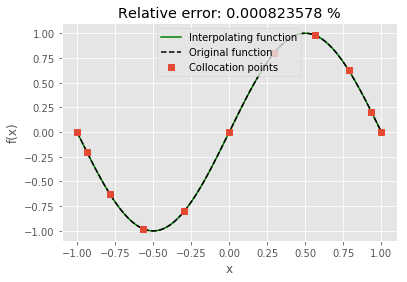

In [4]:
# Lagrange Interpolation
# ----------------------------------------------------------------
# Initialize space in the interval [-1, 1] for plotting the original and interpolated function
nx = 1000
x = np.linspace(-1, 1, nx)
    
# Define an arbitrary function you want to interpolate (change it!)
f = np.sin(np.pi * x)
    
# Give order of Lagrange polynomial
N = 10

# Get collocation points xi from gll routine (worth having a look)
[xi, w] = gll(N)
fi = np.interp(xi, x, f) 
  
# Initialize Lagrange polynomials on the defined grid
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange(N, j, x[i], xi)
        
######################################################
# Calculate interpolating polynomials by multiplying 
# Lagrange polynomials with function values at xi
s = x * 0
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
#
######################################################

# Calculate error of original and interpolated function
error = np.sum((np.abs(f - s))) / np.sum(np.abs(f)) * 100

# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# -------------------
# Plot results  
plt.figure()
plt.plot(x, s, 'k-', color='green', label='Interpolating function')
plt.plot(x, f, 'k--', label='Original function')
plt.plot(xi, fi, 's', label='Collocation points')
plt.title('Relative error: %g %%' % error)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend(loc="upper center")
plt.show()